In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
missing_values=["n/a","na","--","?"]
bankdf=pd.read_csv('../../DATA/bank-additional-full.csv', na_values=missing_values, sep = ';', engine= 'python')

In [4]:
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bankdf.shape

(41188, 21)

In [6]:
bankdf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#make target binary
y_map={'yes':1, 'no':0}
bankdf['y']= bankdf['y'].map(y_map)

In [9]:
bankdf.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

Analize pdays(number of days that passed by after the client was last contacted from a previous campaign) 999 means client was not previously contacted, change the value to 0 or -1?????

In [10]:
bankdf['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [11]:
pdays999=bankdf.loc[bankdf['pdays']==999,'y']
visual = pdays999.value_counts() 
visual

0    36000
1     3673
Name: y, dtype: int64

In [12]:
percentage=1515/39673*100
percentage

3.818718019811963

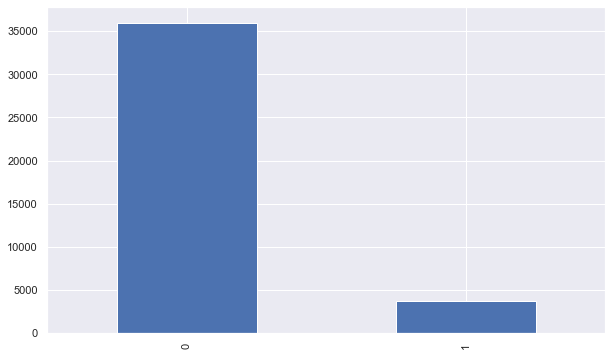

In [13]:
visual.plot(kind='bar')

In [14]:
pdays9992=bankdf.loc[bankdf['pdays']!=999,'y']
visual2 = pdays9992.value_counts() 
visual2

1    967
0    548
Name: y, dtype: int64

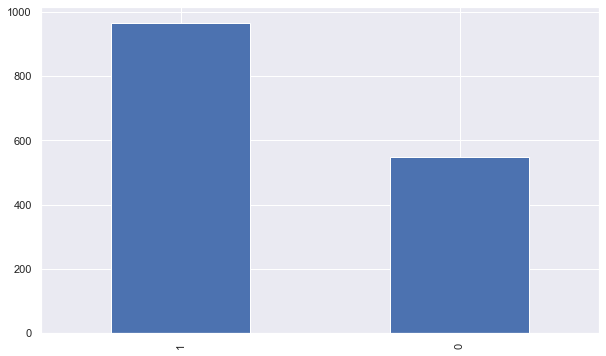

In [15]:
visual2.plot(kind='bar')

In [16]:
z=bankdf.loc[bankdf['pdays']!=999,['y','pdays']]
z1=pd.DataFrame(z)


In [17]:
z1.groupby('pdays')['y'].sum().sort_values(ascending=False)

pdays
3     298
6     289
4      63
7      40
2      37
9      35
10     30
5      29
13     28
12     26
15     16
11     15
8      12
14     11
0      10
1       8
16      6
18      4
17      2
21      2
22      2
26      1
19      1
25      1
27      1
20      0
Name: y, dtype: int64

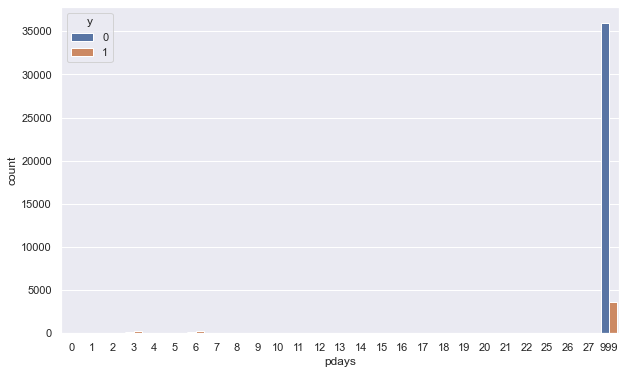

In [18]:
sns.countplot(x='pdays', hue= 'y', data=bankdf)

a very small portion of the customers 3% were previusly contacted from a previous campaign, however I won't drop the column as from this small portion 60% of the people contacted subcribed to the term deposit so it might have an impact on the target.

In [88]:
#convert pdays 999 (clients who hasn't been contacted for previous campaign) into 0
bankdf.loc[bankdf['pdays']==999,'pdays']=0

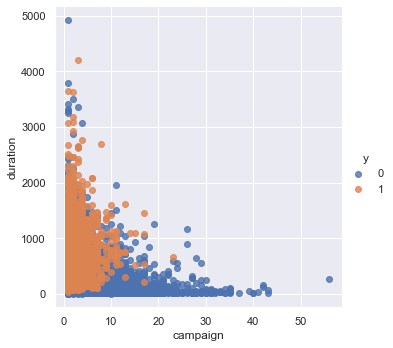

In [89]:
# Campaign (# of contacts performed during this campaign and for this client) VS Duration Calls
sns.lmplot(x='campaign',y='duration', data=bankdf, fit_reg = False, hue='y')

the higher the duration of calls the higher probability in making a deposit.
the duration of calls decreased as the number of contacts performed increased

In [90]:
bankdf.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [91]:
for column in bankdf.select_dtypes('object').columns:
    unique=list(bankdf[column].unique())
    print(column, unique, sep='\n')
    print("-"*40)    

job
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
----------------------------------------
marital
['married', 'single', 'divorced', 'unknown']
----------------------------------------
education
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
----------------------------------------
default
['no', 'yes']
----------------------------------------
housing
['no', 'yes', 'unknown']
----------------------------------------
loan
['no', 'yes']
----------------------------------------
contact
['telephone', 'cellular']
----------------------------------------
month
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
----------------------------------------
day_of_week
['mon', 'tue', 'wed', 'thu', 'fri']
----------------------------------------
poutcome
['nonexistent', 'failure', 'success']
----

In [92]:
bankdf['loan'].mode()

0    no
dtype: object

In [93]:
bankdf['loan'].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

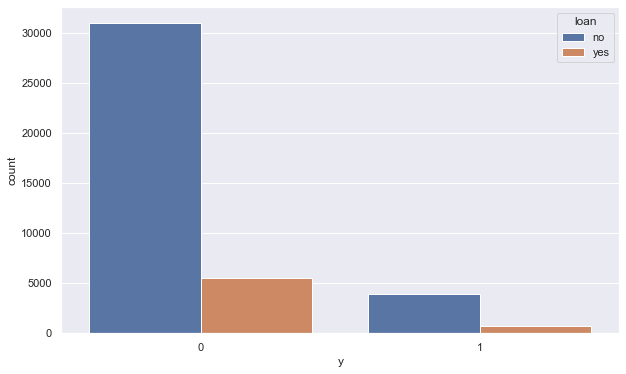

In [94]:
sns.countplot(x='y', hue='loan', data=bankdf)

people who has or has not a personal loan has the highest frequency for both yes or no

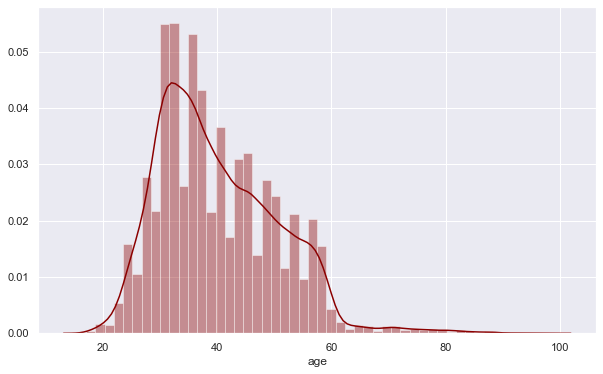

In [95]:
sns.distplot(bankdf['age'], color='darkred')

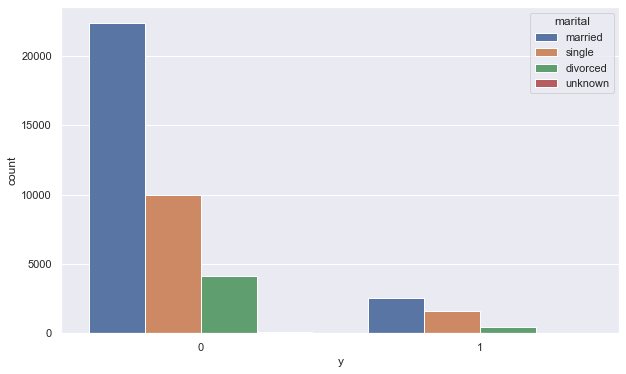

In [96]:
sns.countplot(x='y', hue='marital', data=bankdf)

In [97]:
categoryage=pd.cut((bankdf['age']),bins=[0,20,30,50,np.inf])
categoryage.value_counts().sort_values(ascending=False)
#groupcategoryage=bankdf.groupby(categoryage)['marital'].count()
#groupcategoryage


(30.0, 50.0]    26625
(20.0, 30.0]     7243
(50.0, inf]      7180
(0.0, 20.0]       140
Name: age, dtype: int64

the category of age [30-50] is the one with the most data

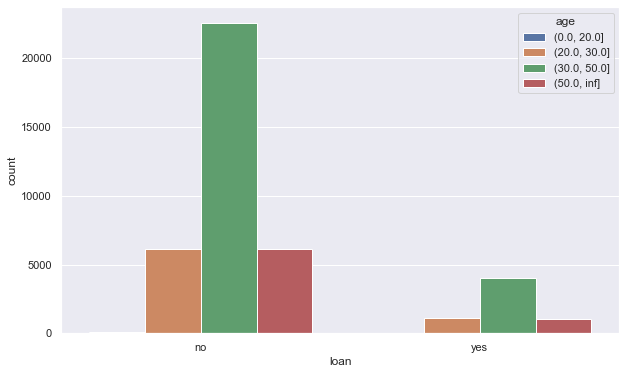

In [98]:
sns.countplot(x='loan', hue= categoryage, data=bankdf)

for unkow category in loan, I'll fill the unknowns with No as is the one that has the highest frequency

In [99]:
bankdf.loc[bankdf['loan'] == 'unknown','loan'] = 'no'

In [100]:
bankdf.loan.value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

In [101]:
# analysis of Housing loan
bankdf.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

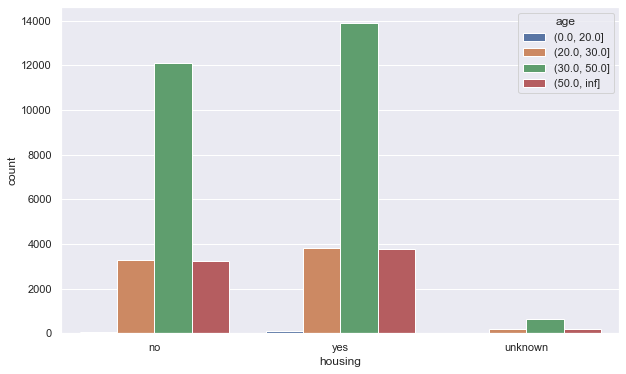

In [102]:
sns.countplot(x='housing', hue= categoryage, data=bankdf)

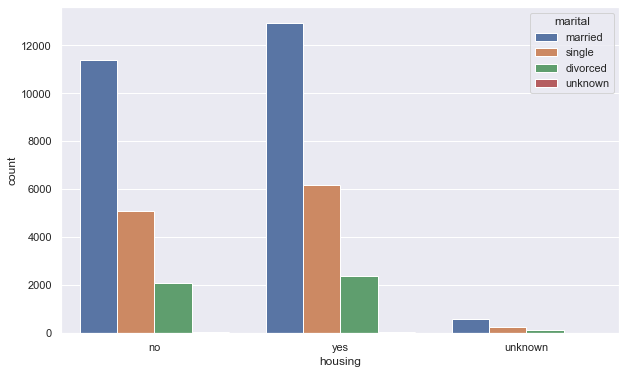

In [103]:
sns.countplot(x='housing', hue= 'marital', data=bankdf)

In [104]:
bankdf.groupby(['housing'])['age'].median()

housing
no         38
unknown    38
yes        38
Name: age, dtype: int64

In [105]:
housage=bankdf[(bankdf['age']<=20)&(bankdf['housing'].str.contains('unknown'))]
housage

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29609,19,student,single,unknown,no,unknown,no,cellular,apr,mon,...,3,0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
37579,17,student,single,basic.9y,no,unknown,no,cellular,aug,fri,...,2,0,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
37934,18,student,single,unknown,no,unknown,no,cellular,sep,thu,...,2,0,0,nonexistent,-3.4,92.379,-29.8,0.809,5017.5,0
40543,19,student,single,high.school,no,unknown,no,cellular,aug,tue,...,1,0,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,1


as the difference in frequency is not significant I'll leave the category of unknown

In [106]:
#default
bankdf.default.value_counts()

no     41185
yes        3
Name: default, dtype: int64

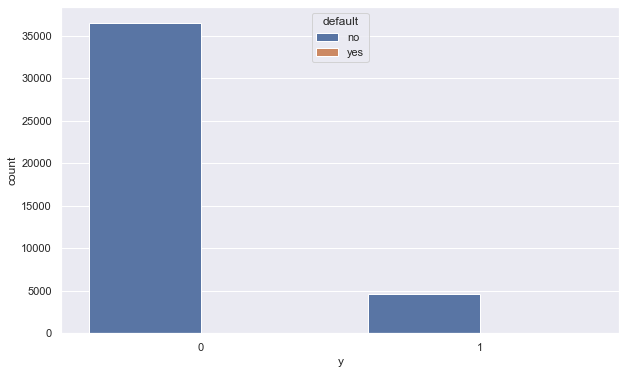

In [107]:
sns.countplot(x='y', hue='default', data=bankdf)

It seems that this is not a very important feature. I'll replace the unknown with no as has the highest frequency.

In [108]:
bankdf.loc[bankdf['default']=='unknown','default']='no'

In [109]:
bankdf.default.value_counts()

no     41185
yes        3
Name: default, dtype: int64

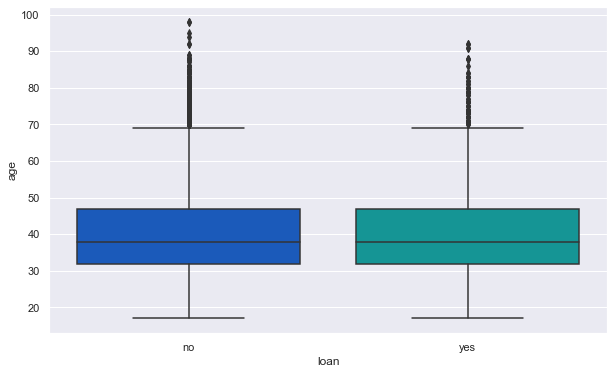

In [110]:
sns.boxplot(x='loan', y='age', data=bankdf, palette='winter')

In [111]:
#numeric features
obj= bankdf.select_dtypes('object').columns
obj

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [127]:

num=bankdf.columns.difference(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome','y'])
num


Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
       'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

C:\Users\monic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\monic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\monic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


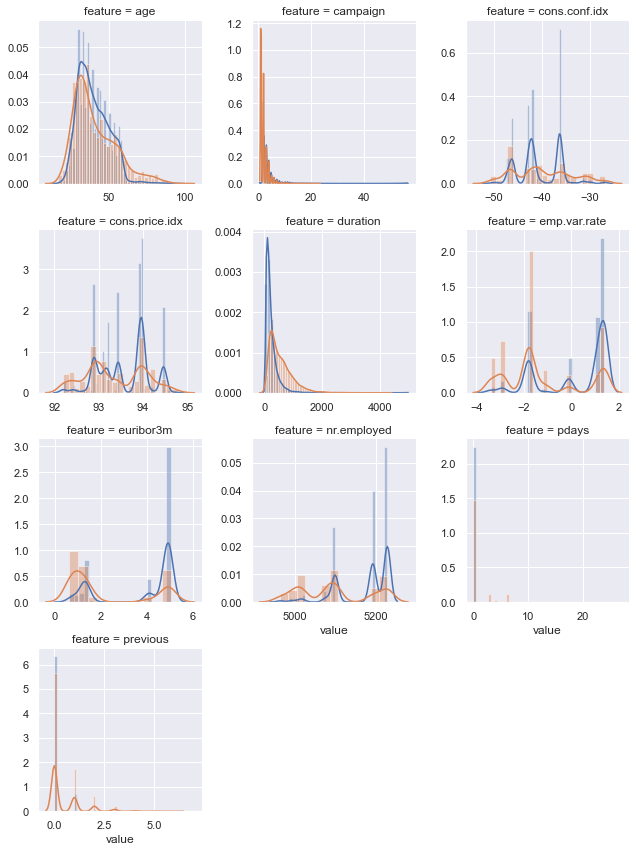

In [128]:
_ = bankdf.melt(id_vars=['y'], value_vars=num, var_name='feature')
g = sns.FacetGrid(data=_, col = "feature", hue='y', sharey=False, sharex=False, col_wrap=3)
g.map(sns.distplot, 'value')
plt.show()

ValueError: num must be 1 <= num <= 9, not 10

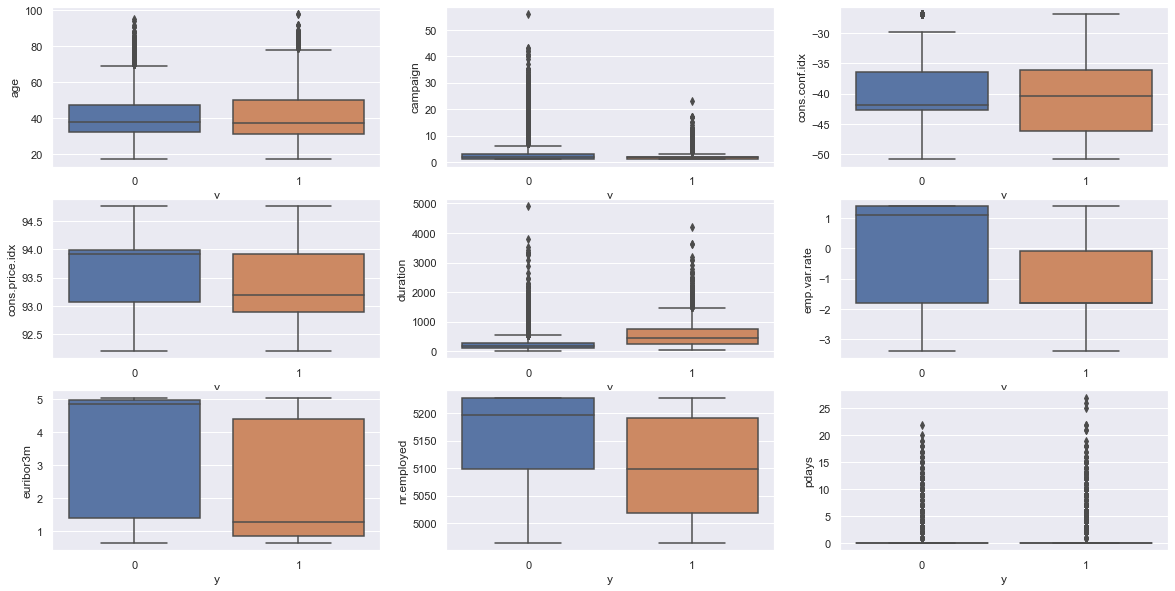

In [129]:
plt.figure(figsize=(20,10))
for i, c in enumerate(num):
    plt.subplot(3,3, i+1)
    sns.boxplot(x='y', y=c, data=bankdf)
plt.show()

In [116]:
#create a copy of DataFrame
df_copy=bankdf.copy()

In [117]:
category_features = ['job','marital','education','housing','loan','default','day_of_week','poutcome','contact','month']

In [118]:
df_copy=pd.get_dummies(df_copy,columns=category_features, drop_first=True)

In [119]:
df_copy.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_yes', 'default_yes', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object'

In [120]:
bankcorr=df_copy.corr()

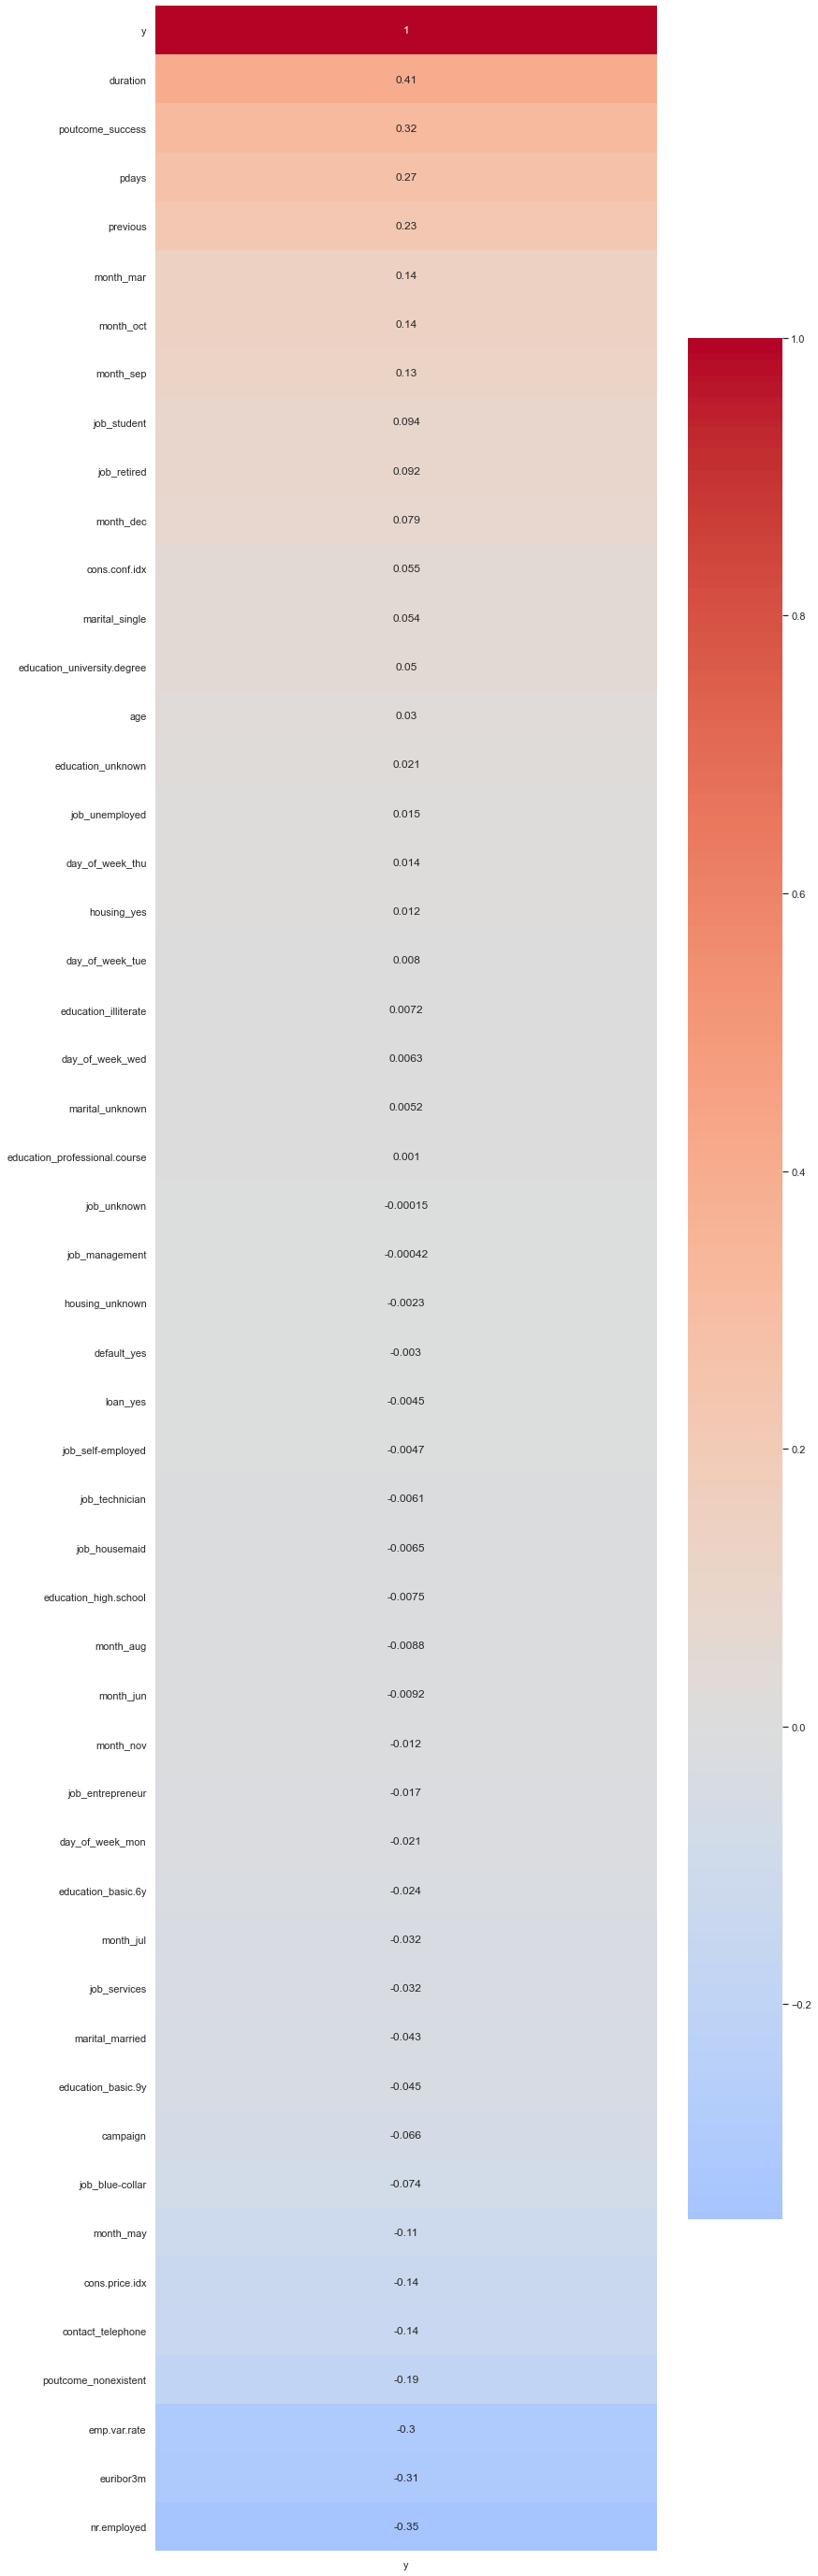

In [121]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(bankcorr[['y']].sort_values('y',ascending=False),annot=True, cmap='coolwarm', center=0)

### Set Target and Predictor/ Feature variables

In [122]:
y=df_copy['y']
y.shape

(41188,)

In [123]:
X=df_copy.drop(['y'],axis=1)
X.shape

(41188, 51)

### Partition the data into training and testing subsets

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify= y)
print('No of 1s in training {}'.format(len(X_train[y_train==1])))
print('No of 1s in testing {}'.format(len(X_test[y_test==1])))
#print('No of 0s in training {}'.format(len(X_train[y_train==0])))

TypeError: Singleton array array({'train': array([0, 0, 0, ..., 1, 1, 1], dtype=int64), 'test': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
      dtype=object) cannot be considered a valid collection.

### Data Standarisation

In [130]:
#scalling data. to scale values to be within 1 standard deviation for numericals(num)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num] = scaler.fit_transform(X_train_scaled[num])
X_test_scaled[num] = scaler.transform(X_test_scaled[num])

### Oversampling minority class

In [131]:
category_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'default',
 'day_of_week',
 'poutcome',
 'contact',
 'month']

In [136]:
# Due to imbalanced classes, the minority class is oversampled using ADASYN/SMOTE techniques

# %%time
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, SMOTENC

class Sampler(object):
    sampler = {'SMOTE':SMOTE(random_state=42), 
               'ADASYN':ADASYN(random_state=42),
               'SMOTENC':SMOTENC(random_state=42, 
                                 categorical_features=[X_train.columns.get_loc(c) for c in category_features]),
               'RandomOverSampler':RandomOverSampler(random_state=42)}
    def __init__(self, name):
        self.smplr = self.sampler[name]
    
    def sampling(self, X_train, y_train):
        X_sampled, y_sampled = self.smplr.fit_resample(X_train, y_train)
        X_sampled = pd.DataFrame.from_records(X_sampled, columns=X_train.columns)
        y_sampled = pd.Series(y_sampled, name='y')
        return X_sampled, y_sampled

#Sampling using different methods

#ADASYN uses a weighted distribution for different minority class examples according 
#to their level of difficulty in learning, where more synthetic data is generated
#for minority class examples that are harder to learn.
sampler = Sampler('ADASYN')
X_train_ADASYN, y_train_ADASYN = sampler.sampling(X_train[num], y_train)
X_train_scaled_ADASYN, y_train_scaled_ADASYN = sampler.sampling(X_train_scaled[num], y_train)
X_test_ADASYN, y_test_ADASYN = sampler.sampling(X_test[num], y_test)

#SMOTENC takes the categorial data into consideration when oversampling
sampler = Sampler('SMOTENC')
X_train_sampled_SMOTENC, y_train_sampled_SMOTENC = sampler.sampling(X_train, y_train)
X_test_sampled_SMOTENC, y_test_sampled_SMOTENC = sampler.sampling(X_test, y_test)

X_train_scaled_SMOTENC, y_train_scaled_SMOTENC = sampler.sampling(X_train_scaled, y_train)
X_test_scaled_SMOTENC, y_test_scaled_SMOTENC = sampler.sampling(X_test_scaled, y_test)

KeyError: 'job'

In [137]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train_scaled_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train_scaled,y_train)
X_test_scaled_SMOTE, y_test_SMOTE = oversample.fit_resample(X_test_scaled,y_test)

In [138]:
y_train_SMOTE.value_counts()

1    25583
0    25583
Name: y, dtype: int64

### Class Definitions

In [140]:
#### Classifiers class
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


class Classifier(object):
    
    
    classifier = {'LogisticRegression':LogisticRegression(),
                  'XGBoost':xgb.XGBClassifier(),
                  'SVM': svm.SVC(),
                  'RandomForestClassifier': RandomForestClassifier()}
    
    
    #Classifier initial parameters
    clfr_init_param = {'LogisticRegression':{'random_state':42, 
                                             
                                             'max_iter':5
                                             }, 
                       'XGBoost': {'objective':'binary:logistic', 
                                   'max_delta_step': 1, 
                                   'random_state':42, 
                                   'min_child_weight':1},
                       'SVM': {'kernel': 'rbf', 
                               'class_weight':'balanced', 
                               'random_state':42},
                       'RandomForestClassifier': {'random_state':42}
                      }
    
    #Classifier tunning parameters
    clfr_tune_param = {'LogisticRegression':{'C':[0.005, 0.01, 0.1, 1.], 
                                             'penalty':['l1', 'l2'],
                                             'class_weight':[{1:10,0:1},{1:1,0:1}, 'balanced']
                                            },

                       'SVM': {'C':[0.005, 0.01, 0.1], 
                               'gamma':[0.001, 0.01, 0.1, 1]},
                       
                       'RandomForestClassifier': {'bootstrap': [True, False],
                                                  'max_depth': [10, 20, 30],
                                                  'max_features': ['auto', 'sqrt'],
                                                  'min_samples_leaf': [1, 2, 4],
                                                  'min_samples_split': [2, 5, 10],
                                                  'n_estimators': [200, 600, 800, 1000, 1200]},
                        'XGBoost':{
                                    'learning_rate': (0.001, 0.01, 'log-uniform'),
                                    'max_depth': (2, 6),
                                    'subsample': (0.1, 1.0, 'uniform'),
                                    'colsample_bytree': (0.1, 1.0, 'uniform'),
                                    'n_estimators': (400, 2000),
                                    'gamma': (0, 10., 'uniform')
                                    }
                      }
                           
    def __init__(self, name):
        self.name = name
        self.tune_param = {'clsfr__'+k: v for k,v in self.clfr_tune_param[name].items()}
        self.model = self.classifier[name].set_params(**self.clfr_init_param[name])

### Plot class definition

In [141]:
#Plot class
class Plot:
    
    def __init__(self):
        pass
    
    @staticmethod  
    def plot_auc(y_test, y_pred_prob):
       
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(fpr, tpr, marker='.')
        plt.show()
        auc_score = roc_auc_score(y_test, y_pred_prob)
        print('AUC: %.3f' % auc_score)
    
    @staticmethod
    def plot_precision_recall(y_test, y_pred_prob):
        
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) 
        plt.title("Precision-Recall vs Threshold Chart")
        plt.plot(thresholds, precision[:-1], "b--", label="Precision")
        plt.plot(thresholds, recall[:-1], "r--", label="Recall")
        plt.ylabel("Precision, Recall")
        plt.xlabel("Threshold")
        plt.legend(loc="lower left")
        plt.ylim([0,1])
        plt.show()

        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve')
        plt.show()
    
    @staticmethod
    def confusion_matrix(y_true, y_pred):
        
        print("Classification Report: \n", classification_report(y_true=y_true, y_pred=y_pred))
        accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
        print("\nAccuracy",accuracy)
        
        conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
        print('Confusion matrix:\n', conf_mat)

        labels = ['Class 0', 'Class 1']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.show()

## Hyperparameter

In [150]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

#Cross validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    )

class HyperTuning(object):
    
    def __init__(self):
        pass
    
    @staticmethod
    def grid_search(name, X_train, y_train):
        clfr = Classifier(name)
        pipe = Pipeline([('clsfr', clfr.model)])

        grid = GridSearchCV(pipe, cv=cv, 
                            param_grid=clfr.tune_param, 
                            iid=True, 
                            scoring='f1_weighted', 
                            verbose=3, 
                            n_jobs=-1,
                            refit=True
                           )

        grid.fit(X_train, y_train)
        
        print('Finished GridSearch')
        
        return grid 
    
    @staticmethod
    def baysian_search(name, X_train, y_train):
        clfr = Classifier(name)
        pipe = Pipeline([('clsfr', clfr.model)])

        opt = BayesSearchCV(
              estimator=pipe,
              scoring='f1_weighted',
              search_spaces = [(clfr.tune_param, 5)], # (parameter space, # of evaluations)
              cv=cv,
              verbose = True,
              n_jobs = -1,
              refit = True,
              random_state = 42
            )
        opt.fit(X_train, y_train)
        print('Finished Training')
        
        return opt
        
    
    @staticmethod
    def evaluate_opt(opt, X, y):
        print('Best model\n')
        print(opt.best_estimator_)
        print('\n')
        print('Best score on the validation: {}'.format(opt.best_score_))
        result_df = pd.DataFrame(opt.cv_results_)\
          .loc[:,['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score')
        print(result_df.head(5))
        print("*******************Training************************")
        print("Best. score: %s" % opt.best_score_)

        y_pred_prob = opt.predict_proba(X['train'])[:,1]
        y_pred = opt.predict(X['train'])
        Plot.confusion_matrix(y['train'], y_pred)

        ##################################
        print("*****************Testing***************************")

        y_pred_prob = opt.predict_proba(X['test'])[:,1]
        y_pred = opt.predict(X['test'])
        Plot.plot_auc(y_test, y_pred_prob)
        Plot.confusion_matrix(y['test'], y_pred)
        Plot.plot_precision_recall(y['test'], y_pred_prob)

### Modelling

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.0min finished
C:\Users\monic\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Finished Training
Best model

Pipeline(steps=[('clsfr',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8195980974464558, gamma=4,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.003362174400516434,
                               max_delta_step=1, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=1846,
                         

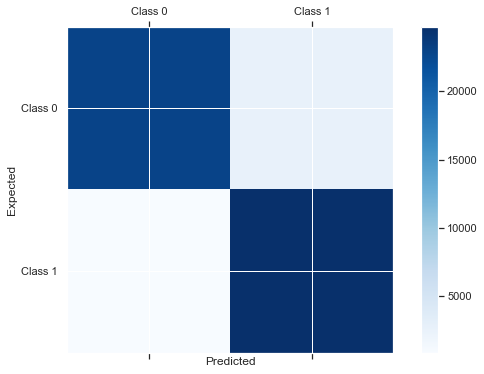

*****************Testing***************************


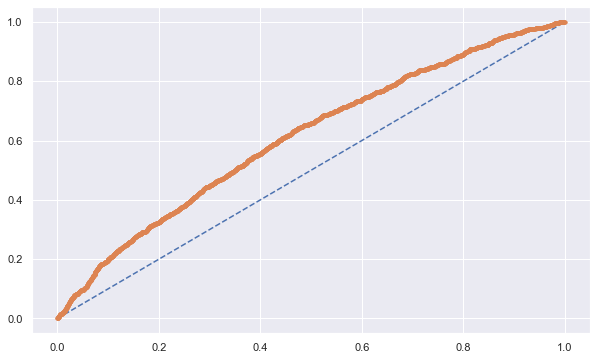

AUC: 0.611
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10965
           1       0.11      1.00      0.20      1392

    accuracy                           0.11     12357
   macro avg       0.06      0.50      0.10     12357
weighted avg       0.01      0.11      0.02     12357


Accuracy 0.11264870114105366
Confusion matrix:
 [[    0 10965]
 [    0  1392]]


C:\Users\monic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


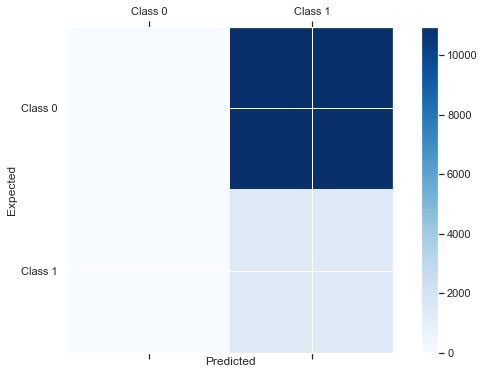

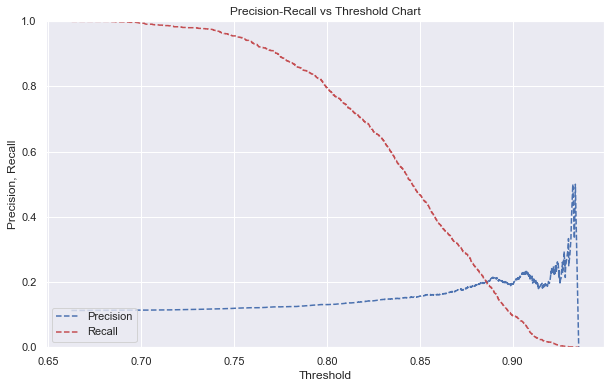

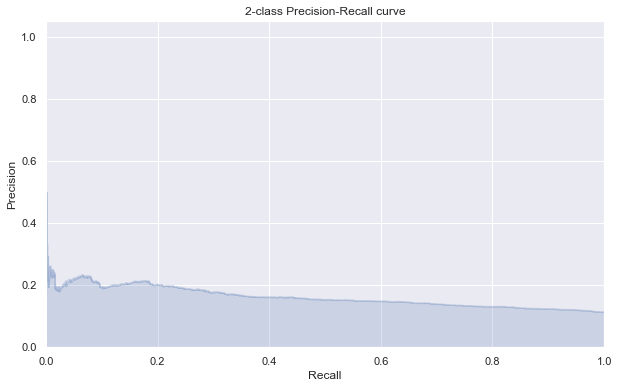

In [151]:
name = 'XGBoost'
features = X_train_scaled_SMOTE.columns
X = {'train': X_train_scaled_SMOTE.values, 'test':X_test[features].values}
y = {'train': y_train_SMOTE.values, 'test':y_test.values}

opt = HyperTuning.baysian_search(name, X['train'], y['train'])
HyperTuning.evaluate_opt(opt, X, y)

In [147]:
X_train_scaled_SMOTE.values

array([[ 0.96101604, -0.40811411, -0.20249907, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05722877, -0.38495943,  0.88720116, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57616512, -0.16884905, -0.20249907, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28293296, -0.13980834, -0.56573248, ...,  0.        ,
         0.        ,  1.        ],
       [-0.62432404,  1.56989734, -0.20249907, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16420407,  1.44358111,  0.12346518, ...,  0.        ,
         0.        ,  0.        ]])

### Build Model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [90]:
logreg=LogisticRegression(class_weight='balanced')

In [91]:
# train/ fit model
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [92]:
#predict
y_predlog=logreg.predict(X_test)
y_predlog[:50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0], dtype=int64)

### Evaluation of Model

In [93]:
logreg_score=logreg.score(X_train,y_train)
logreg_score

0.8594568346571398

In [97]:
logreg_scoretest=logreg.score(X_test,y_test)
logreg_scoretest

0.8600793072752286

In [98]:
cm=metrics.confusion_matrix(y_test,y_predlog)
cm

array([[9388, 1580],
       [ 149, 1240]], dtype=int64)

In [99]:
#'yes':1, 'no':0
cm_df=pd.DataFrame(cm, index=['NO deposit', 'YES deposit'],
                   columns=['predicted_NO','predicted_YES'])
cm_df

,predicted_NO,predicted_YES
NO deposit,9388,1580
YES deposit,149,1240


In [100]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


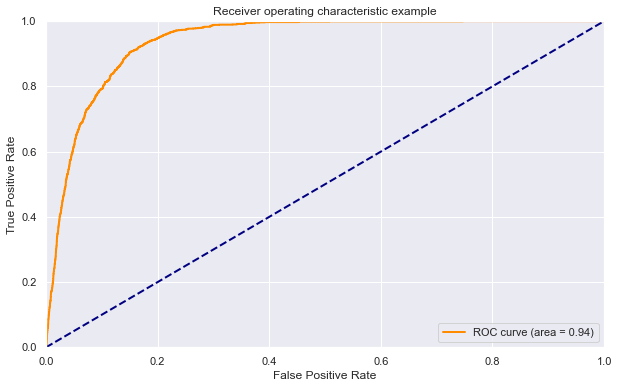

In [101]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [102]:
preds = logreg.predict_proba(X_test)[:,1]###ASK??
preds

array([0.31094762, 0.04960328, 0.03643881, ..., 0.05379091, 0.02504014,
       0.10415559])

In [103]:
logreg.predict_proba(X_test)

array([[0.68905238, 0.31094762],
       [0.95039672, 0.04960328],
       [0.96356119, 0.03643881],
       ...,
       [0.94620909, 0.05379091],
       [0.97495986, 0.02504014],
       [0.89584441, 0.10415559]])

Precision might be more useful to evaluate as there are many TN (10,677) an precision doesn't include this so it won't be affected by the imbalance

In [104]:
print(cm)

[[9388 1580]
 [ 149 1240]]


In [105]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [106]:
#PRECISION when a positive value is predicted, how often is the prediction correct?
precision=TP/float(TP+FP)
print(precision)

0.4397163120567376


In [107]:
metrics.precision_score(y_test,y_predlog)

0.4397163120567376

In [108]:
#Sensitivity/recall: how many of the actual positives did the model predicted
recall=TP/float(TP+FN)
print(recall)

0.8927285817134629


In [109]:
metrics.recall_score(y_test,y_predlog)

0.8927285817134629

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10968
           1       0.44      0.89      0.59      1389

    accuracy                           0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357



### Support Vector Classifier

In [81]:
svc=SVC()
svc.fit(X_train,y_train)
y_predsvc=svc.predict(X_test)

In [83]:
SVC_scoretest=svc.score(X_test,y_test)
SVC_scoretest

0.9090394108602412

In [84]:
print(classification_report(y_test,y_predsvc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.67      0.37      0.48      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357



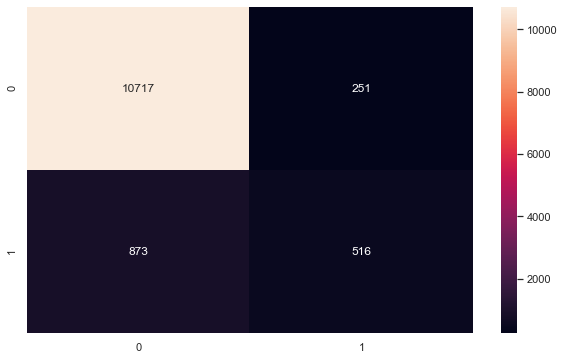

In [85]:
cm = confusion_matrix(y_test, y_predsvc)
sns.heatmap(cm,annot=True,fmt="d")

### Naive Bayes

In [86]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_prednb=nb.predict(X_test)

In [88]:
nb_scoretest=nb.score(X_test,y_test)
nb_scoretest

0.7470259771789269

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     10968
           1       0.28      0.80      0.42      1389

    accuracy                           0.75     12357
   macro avg       0.62      0.77      0.63     12357
weighted avg       0.89      0.75      0.79     12357



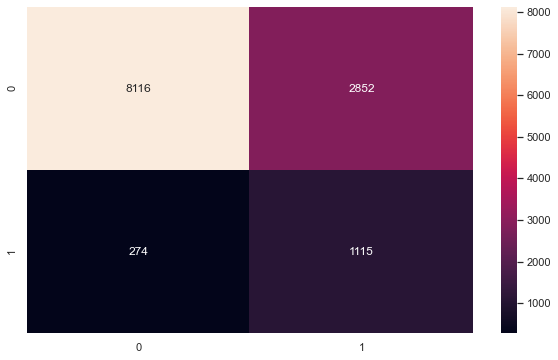

In [89]:
print(classification_report(y_test,y_prednb))
cm = confusion_matrix(y_test, y_prednb)
sns.heatmap(cm,annot=True,fmt="d")

### check all the models accuracy with cross validation

In [75]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
svc_cv=SVC()
nb_cv=GaussianNB()

cv_dict = {0: 'Logistic Regression', 1:'SVC', 2:'Naive Bayes'}
cv_models=[logreg_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=5, scoring ='accuracy').mean()))


C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Test Accuracy: 0.7676676922735932
SVC Test Accuracy: 0.614125254438026
Naive Bayes Test Accuracy: 0.49642395148366686


In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
#svc_cv=SVC()
nb_cv=GaussianNB()

cv_dict = {0: 'Logistic Regression', 1:'Naive Bayes'}
cv_models=[logreg_cv,nb_cv]
scorings=['acc']


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=5, scoring ='accuracy').mean()))